In [147]:
#Model imports 
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

#Data procesing
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import numpy as np
import random
import pickle

#Visualization 
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline 


In [148]:
#_____ SETTING THE DATA PATH ______
DATADIR = "/Users/ewa_anna_szyszka/Desktop/ImageRecognition/data"

#_____ CATEGORIES OF CLASSES ______
CATEGORIES = ["A", "B", "C", "D", "E","F", "G", "H", "I", "J","K", "L", "M",'N','O','P','R','S','T','U','W','X','Y','Z']

#_____ SETTING UP THE TRAINING DATA ______
IMG_SIZE = 50

training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        one_hot_target = np.zeros(len(CATEGORIES))
        class_num = CATEGORIES.index(category)  #the category encoading
        one_hot_target[class_num] = 1
        
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img)) #cv2.IMREAD_GRAYSCALE
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array,one_hot_target])  #[image, category]
            except Exception as e:
                pass
            #plt.imshow(img_array, cmap='gray')
            #plt.show()

create_training_data()

#___ SHUFFLING THE DATA TO IMPROVE THE TRAINING QUALITY _____
random.shuffle(training_data)


for sample in training_data[:10]:
    print(sample[1])
    print(sample[0])


X = [] #feature set
y = [] #labels


for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE, 3) # 1 because it is a gray scale


[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.]
[[[171 173 191]
  [170 170 189]
  [173 171 186]
  ..., 
  [185 179 199]
  [181 179 200]
  [178 179 201]]

 [[139 159 187]
  [142 163 187]
  [156 155 188]
  ..., 
  [173 184 206]
  [176 184 209]
  [177 188 207]]

 [[159 166 197]
  [160 165 196]
  [160 164 198]
  ..., 
  [179 186 210]
  [183 189 211]
  [186 190 206]]

 ..., 
 [[ 41  74  94]
  [ 59  73  87]
  [ 61  73  95]
  ..., 
  [ 71  40 103]
  [ 71  37  85]
  [ 63  41  93]]

 [[ 63  82 104]
  [ 61  82 105]
  [ 63  84 107]
  ..., 
  [112  82 139]
  [142 147 195]
  [178 198 208]]

 [[ 71  88 110]
  [ 68  88 111]
  [ 69  88 111]
  ..., 
  [ 93  90 125]
  [113 132 138]
  [143 184 177]]]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.]
[[[ 35  27  74]
  [ 50  30  88]
  [ 65  81 134]
  ..., 
  [ 16   8  49]
  [ 25   6  48]
  [ 21   9  42]]

 [[ 50  57 100]
  [ 33  30  90]
  [ 58  43 113]
  ...

In [153]:

pickle_out = open("X.pickle",'wb')
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out= open("y.pickle",'wb')
pickle.dump(y,pickle_out)
pickle_out.close()


pickle_in = open("X.pickle",'rb')
print('ready')
X = pickle.load(pickle_in)


ready


In [154]:
X[1]

array([[[ 35,  27,  74],
        [ 50,  30,  88],
        [ 65,  81, 134],
        ..., 
        [ 16,   8,  49],
        [ 25,   6,  48],
        [ 21,   9,  42]],

       [[ 50,  57, 100],
        [ 33,  30,  90],
        [ 58,  43, 113],
        ..., 
        [ 23,   7,  48],
        [ 22,   9,  45],
        [ 20,   8,  45]],

       [[ 79,  92, 132],
        [ 76,  72, 123],
        [ 88,  82, 135],
        ..., 
        [ 24,   8,  50],
        [ 22,   9,  45],
        [ 22,   9,  42]],

       ..., 
       [[ 23,  13,  18],
        [  8,  11,  17],
        [ 15,  12,  18],
        ..., 
        [  6,   4,  11],
        [  6,   2,   5],
        [  3,   3,   5]],

       [[ 10,  12,  13],
        [ 14,  12,  16],
        [ 16,  14,  15],
        ..., 
        [  2,   5,  11],
        [  1,   3,   6],
        [  6,   2,   2]],

       [[ 19,  10,  18],
        [ 11,   8,  15],
        [ 23,   9,   7],
        ..., 
        [  3,   5,  10],
        [  2,   3,   5],
        [  1,   3,

In [158]:

y = np.asarray(y)
type(y)
y[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [159]:


X = pickle.load(open("X.pickle",'rb'))
y = pickle.load(open("y.pickle",'rb'))



#normalizing the imagery data --> 255 max ---> why and explain 
X = X/255.0 # normalizing the image data --> expplain why 


In [160]:
print X.shape

(68635, 50, 50, 3)


In [161]:

#Test train split in the data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [162]:
print(len(X_train),len(y_train) ,len(X_test),len(y_test))

(45985, 45985, 22650, 22650)


In [163]:
#reshapig the data to the correct size 

X_train = X_train.reshape(45985,50,50,3)
X_test = X_test.reshape(22650,50,50,3)


In [164]:
print(len(X_train),len(y_train) ,len(X_test),len(y_test))

(45985, 45985, 22650, 22650)


In [169]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
type(y_train)

numpy.ndarray

In [171]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten#create model
model = Sequential()#add model layers
model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(50,50,3)))
model.add(Conv2D(32, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(24, activation="softmax"))
#
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Train on 45985 samples, validate on 22650 samples
Epoch 1/3
45985/45985 [==============================] - 521s 11ms/step - loss: 0.6773 - acc: 0.8156 - val_loss: 0.3441 - val_acc: 0.9041
Epoch 2/3
45985/45985 [==============================] - 477s 10ms/step - loss: 0.1977 - acc: 0.9448 - val_loss: 0.3002 - val_acc: 0.9203
Epoch 3/3
45985/45985 [==============================] - 424s 9ms/step - loss: 0.0920 - acc: 0.9744 - val_loss: 0.3107 - val_acc: 0.9225


In [173]:
#using first 4 test data points to check the model
first_predictions = model.predict(X_test[:4])

In [207]:
#predicted 
print(first_predictions[0])
print(y_test[0])
X_test[0]

[  1.26876536e-15   5.03923570e-10   4.73471574e-11   9.99999523e-01
   3.08350004e-12   3.44905828e-08   1.06987037e-10   2.40832202e-12
   1.30400934e-07   2.77398542e-17   4.90254637e-09   9.44884260e-09
   1.61159792e-14   6.25753572e-13   2.87943058e-10   8.34928071e-10
   6.34221635e-08   1.37108117e-10   4.01560873e-09   8.40325232e-09
   9.57058434e-13   2.50951501e-07   1.69069619e-11   4.27788489e-18]
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.]


array([[[ 0.81960784,  0.89019608,  0.86666667],
        [ 0.76470588,  0.87058824,  0.88627451],
        [ 0.72941176,  0.8627451 ,  0.88627451],
        ..., 
        [ 0.34509804,  0.31372549,  0.50588235],
        [ 0.38823529,  0.25882353,  0.30196078],
        [ 0.25882353,  0.21568627,  0.30588235]],

       [[ 0.82745098,  0.99215686,  0.98431373],
        [ 0.86666667,  0.99215686,  0.98823529],
        [ 0.83529412,  0.98823529,  0.99215686],
        ..., 
        [ 0.28627451,  0.25882353,  0.51372549],
        [ 0.36862745,  0.30980392,  0.31764706],
        [ 0.27058824,  0.19607843,  0.30980392]],

       [[ 0.9372549 ,  0.98039216,  0.99215686],
        [ 0.94509804,  0.98039216,  0.99215686],
        [ 0.94117647,  0.95686275,  0.97254902],
        ..., 
        [ 0.30196078,  0.29019608,  0.53333333],
        [ 0.37254902,  0.16470588,  0.30980392],
        [ 0.23921569,  0.19215686,  0.30980392]],

       ..., 
       [[ 0.71372549,  0.75294118,  0.92156863],
        

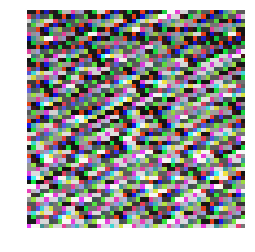

In [206]:
from PIL import Image
from matplotlib.pyplot import imshow
%matplotlib inline
a = X_test[3]
img = Image.fromarray(a,'RGB')


from matplotlib import pyplot as plt
plt.imshow(img, interpolation='nearest')
plt.axis("off")
plt.show()
#img = Image.fromarray(first_predictions[0], 'RGB')

In [182]:
from PIL import Image
import numpy as np

w, h = 512, 512
data = np.zeros((h, w, 3), dtype=np.uint8)
data[256, 256] = [255, 0, 0]
print(data)
img = Image.fromarray(data, 'RGB')
img.show()

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ..., 
 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [114]:
print(X_train.shape,X_test.shape)

((45985, 50, 50, 3), (22650, 50, 50, 3))


In [122]:
from keras.models import Model
import keras
base_model = VGG19(#weights='imagenet',
    weights = None, include_top=False, input_shape=(50,50, 3))
x = base_model.output
#x = Flatten()(x)
predictions = Dense(45985, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
# First: train only the top layers (which were randomly initialized)
for layer in base_model.layers:
    layer.trainable = False
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]
model.summary()

AttributeError: 'MaxPooling2D' object has no attribute 'outbound_nodes'

In [117]:
model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test))

ValueError: Error when checking model target: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 array(s), but instead got the following list of 45985 arrays: [array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
   ...

In [118]:
model = Sequential()

#The first layer in your model must specify the shape of the input.
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

ValueError: Error when checking input: expected dense_5_input to have 2 dimensions, but got array with shape (45985, 50, 50, 3)

In [84]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten#create model
model = Sequential()#add model layers
model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(50,50,1)))
model.add(Conv2D(32, kernel_size=3, activation="relu"))
#model.add(Flatten())
#model.add(Dense(10, activation="softmax"))




model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)
#X_out = np.concatenate([X_test, y_test])
#model.fit([X_train, X_train], X_out, epochs=50, batch_size=32)

ValueError: Error when checking model target: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 array(s), but instead got the following list of 45985 arrays: [array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
   ...

In [35]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape = X.shape[1:]))




#model = Sequential()
#model.add(Dense(32, input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = 2))

model.compile(loss='categorical_crossentropy', optimizer= 'adam',metrics= ['accuracy'])
model.fit(X,y, batch_size=20, validation_split=0.1)





ValueError: Error when checking target: expected max_pooling2d_7 to have 4 dimensions, but got array with shape (68635, 1)